<a href="https://colab.research.google.com/github/Matthew-Calvario/github-introfall25-Matthew-Calvario/blob/main/In_Class_Assignment_5_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming - In-Class Assignment


Import necessary libraries and load the data

From kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset):
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone on board, resulting in the death ofmore than half of the passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

This exercise seeks to explore the factors that appeared to influence survival.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the 'titanic' dataset from seaborn
titanic_data = sns.load_dataset('titanic')

display(titanic_data.head())
print(titanic_data.shape)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


(891, 15)


Task 1: Calculate overall survival rate.

Hint: becausse 'survived' is 0 and 1, survival rate can be computed as the .mean() of that column

In [ ]:
# Calculate overall survival rate


Overall Survival Rate: 38.38%


Task 2: Calculate and print the survival rates by gender/sex ('sex'), passenger class ('class'), and embarkation point ('embarked'; the location where the journey began).

Hint: the material showed us how to filter material, which can work here. Pandas dataframes also offers a convenient function groupby, that will take a one or a list of columns, and group the data by the values of that/those column(s). Operations (such as .mean()) on the returned item will be performed on each group.

Survival Rate by Gender:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


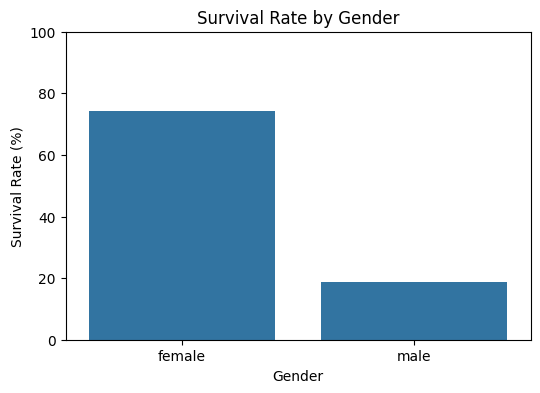

In [ ]:
# Calculate survival rates by gender and visualize it



Survival Rate by Passenger Class:
class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64


/tmp/ipython-input-1275582745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = titanic_data.groupby('class')['survived'].mean() * 100


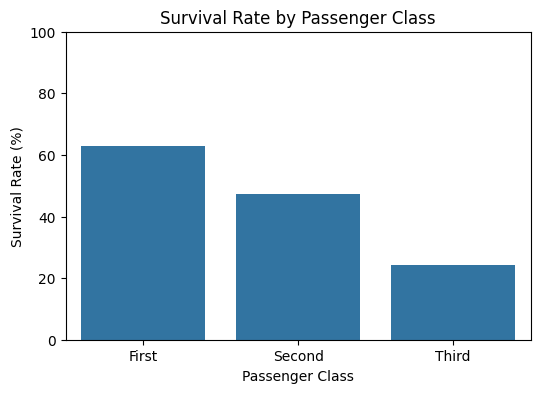

In [ ]:
# Calculate survival rates by passenger class and visualize it



Survival Rate by Embarkation Point:
embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64


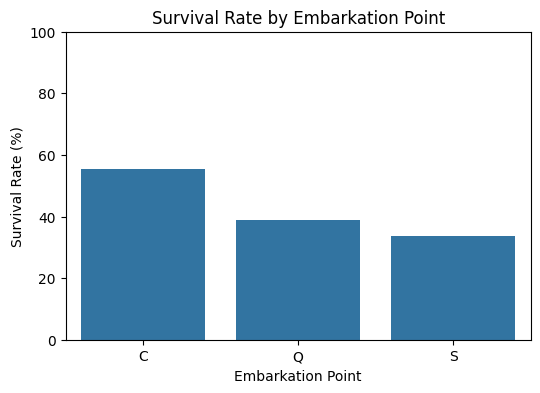

In [ ]:
# Calculate survival rates by embarkation point and visualize it
survival_by_embarkation = titanic_data.groupby('embarked')['survived'].mean() * 100
print("\nSurvival Rate by Embarkation Point:")
print(survival_by_embarkation)

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_embarkation.index, y=survival_by_embarkation.values)
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Embarkation Point')
plt.ylim(0, 100)
plt.show()

Task 3: Calculate the survival rate by age group (under 12 as child, 13-20 as teen, 21-40 as adult, 41-60 as middle-aged, above 61 as senior).

In [11]:
# create a new column age_group based on the criteria above
bins = [0, 12, 20, 40, 60, np.inf]
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels, right=True)

# Handle NaN values in 'age' by assigning them to an 'Unknown' category
titanic_data['age_group'] = titanic_data['age_group'].cat.add_categories('Unknown')
titanic_data['age_group'] = titanic_data['age_group'].fillna('Unknown')


# Calculate survival rates by age group
survival_by_age_group = titanic_data.groupby('age_group')['survived'].mean() * 100
print("\nSurvival Rate by Age Group:")
print(survival_by_age_group)


Survival Rate by Age Group:
age_group
Child          57.971014
Teen           38.181818
Adult          39.740260
Middle-Aged    39.062500
Senior         22.727273
Unknown        29.378531
Name: survived, dtype: float64


/tmp/ipython-input-76797667.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = titanic_data.groupby('age_group')['survived'].mean() * 100


Task 4: Create a box plot for age distribution by survival.

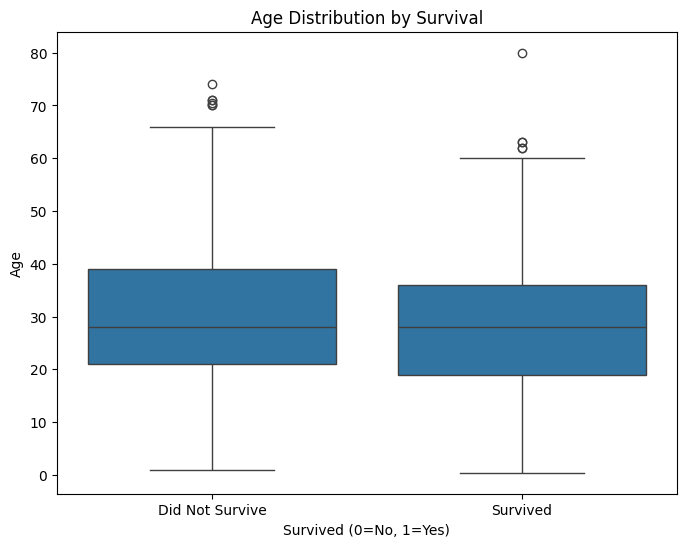

In [12]:
# Create a box plot for age distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

Task 5: Create a stacked bar chart to visualize the distribution of Titanic passengers by class, using different colors to represent survival status within each class.
Hint: try creating a comment to do this one and use the AI to help. What is this code doing?

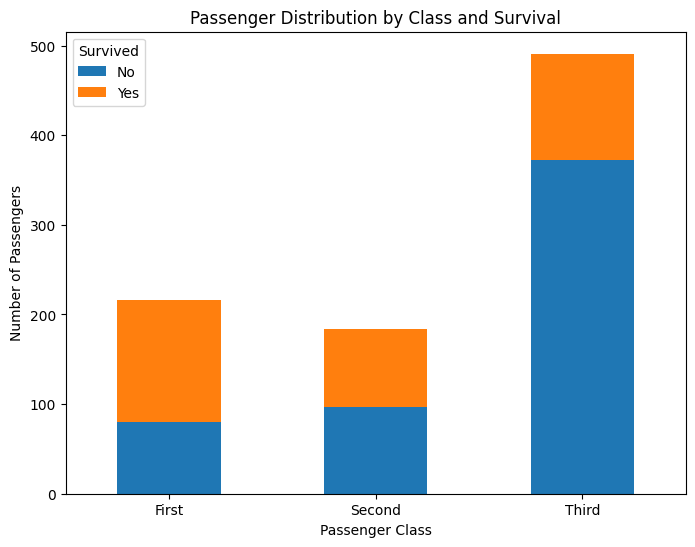

In [13]:
# Create a stacked bar chart to visualize the distribution of Titanic passengers by class

# Create a cross-tabulation of class and survival
class_survival = pd.crosstab(titanic_data['class'], titanic_data['survived'])

# Plot the stacked bar chart
class_survival.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Passenger Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Open-Ended Questions:** From our analysis, some more in-depth questions can be raised. Please discuss and attempt to answer them by using Python to perform data analysis and visualizations to support your claims. Keep in mind that there are no definitive answers to these questions.

Question 1: Given, from task 2, the survival rates by embarkation point are as follows:

| Embarkation Point | Survival Rate (%) |
|-------------------|--------------------|
| C                 | 55.36              |
| Q                 | 38.96              |
| S                 | 33.70              |

does this indicate that, if you will be on the Titanic, better to select Port C as your embarkation point for increasing the chances of survival?

**Your Q1 discussion here:** Based on the embarkation point survival rates, yes, Port C would statistically give me better odds at survival compared to Q and S. However, a few considerations: While it could be something causal such as the time at which this embarkation point let the people leave or the location, it could be something correlational, like the demographic of the people were prioritized (women, children).

In [ ]:
# Optional: if you have code to support your Q1 discussion, please add it here.


Question 2: Given, from task 3, the survival rates by age group are as follows:

| Age Group | Survival Rate (%) |
|-----------|--------------------|
| Child     | 57.97              |
| Teen      | 38.18              |
| Adult     | 39.74              |
| Middle-Aged| 39.06              |
| Senior    | 22.73              |

Does this indicate that senior passengers were less taken care of?



**Your Q2 discussion here:** It could be possible that, due to their age, those who were older had less priority compared to children. However, it may also be that those older in age were not as able-bodied and therefore could not easily bypass physical obstacles to reach embarkation points and any points of safety.

In [ ]:
# Optional: if you have code to support your Q2 discussion, please add it here.


When you are done, make sure to submit your assignments in accordance with the instructions on canvas.